# Tutorial  07

In this tutorial we will be working with a random forest ensemble classifier. You will be:

* Training a random forest classifier on the 'wine' dataset.
* Optimise the number of weak-learners in the ensemble.
* Analyse the feature importance indicated by the random foest algorithm.

First we will import the data and train a single ensemble: 

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine
from sklearn.ensemble import (RandomForestClassifier,AdaBoostClassifier)
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

# import some data to play with - the iris dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

rf_clf = RandomForestClassifier(n_estimators=10)
rf_scores = cross_val_score(rf_clf, X, y, cv=3)

print(mean(rf_scores))


0.9104519774011299


## Tasks for you
Update the code above so that a random forest classifier with 10 weak learners is trained and the cross validation scores are calculated using the X, y data.

Now we can move through and optimise the number of estimators needed to acheive the best results on the wine dataset. We will also construct a figure that contains a plot of the mean scores for each number of weak-learners tested. Here is the starter code:

Text(0, 0.5, 'Mean Score')

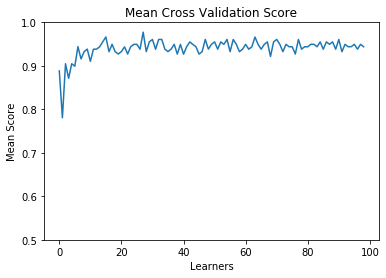

In [3]:
cros_val_scores = [];
best_score = 0;
best_learners = 1

for weak_learners in range(1,100):

    rf_clf = RandomForestClassifier(n_estimators=weak_learners)
    rf_scores = cross_val_score(rf_clf, X, y, cv=3)
    cros_val_scores.append(mean(rf_scores))
    if mean(rf_scores) > best_score:
        best_score = mean(rf_scores)
        best_learners = weak_learners
    
fig,ax = plt.subplots()
ax.plot(cros_val_scores)    
ax.set_ylim(0.5,1)    
ax.set_title('Mean Cross Validation Score')
ax.set_xlabel('Learners')
ax.set_ylabel('Mean Score')

## Tasks for you

Update the code above so that it completes the following:
1. Constructs a random forest classifier for each test number of estimators
2. Calculates and stores the cross validation scores.
3. Keeps track of the best configuration.
4. Constructs a plot of the cross validation scores.

Once we know the best configuation (i.e. we have optimised the number of weak-learners), we can investigate the feature importance:

Text(0.5, 1.0, 'Feature Importance')

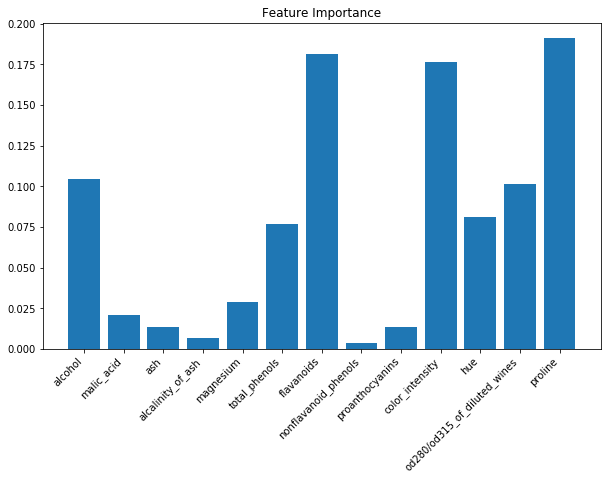

In [4]:
rf_clf = RandomForestClassifier(n_estimators=best_learners)
rf_clf.fit(X, y)
importances = rf_clf.feature_importances_

fig,ax = plt.subplots(figsize=(10,6))
ax.bar(np.arange(len(importances)),importances, align="center")
ax.set_xticks(np.arange(len(importances)))
ax.set_xticklabels(wine_data.feature_names)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set_title('Feature Importance')

## Assignment 3

Use the remaining time in this tutorial to work on your group assignment.